# Lecture 4: Physical interpretation of model problems



In [1]:
# Initialisation

%matplotlib inline

import matplotlib
from matplotlib import animation, rc
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sympy import *
from scipy.sparse import diags
from ipywidgets import *
from IPython.display import display, Markdown
rc('animation', html='jshtml')

## Hyperbolic Equations

We examine the propagation of the linear advection equation:

$$
\frac{\partial \phi}{\partial t} + a \frac{\partial \phi}{\partial x} = \phi_t + a \phi_x = 0
$$

In this example, we consider the boundary conditions

$$
\phi(0,t) = 0
$$

and initial conditions

$$
\phi(x,0) =
\begin{cases}
\sin \left(2 \pi x\right) & \text{if $x \in \left[0, \frac{1}{2}\right]$} \\
0 & \text{otherwise}
\end{cases}
$$

We plot the progression of the propagation of $\phi(x,t)$ with time.

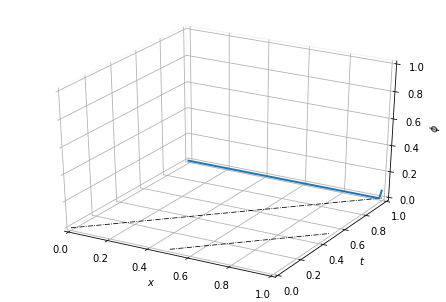

In [2]:
# Initialise arrays and equations
x = Symbol('x')
L = 1.
dx = 0.01
dt = 0.01
a = 1.
xl = np.arange(0,(L+dx),dx)
u0 = Piecewise((0, x < 0), (sin(2*np.pi*x/L), x <= L/2), (0, True))
uc = np.array([u0.subs(x,xi) for xi in xl])

# Initialise plotting
fig = plt.figure()
ax =  Axes3D(fig)

# Guidelines
gl1 = ax.plot([0.,L*a],[0.,1.],'k-.',lw=.8)
gl2 = ax.plot([L/2,(L+L*a)/2],[0.,.5],'k-.',lw=.8)

# Equation Line
line, = ax.plot(xl,uc,0,lw=2)

# Visuals
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$t$')
ax.set_zlabel(r'$\phi$')
ax.set_xlim3d([0.,L ])
ax.set_ylim3d([0.,1.])
ax.set_zlim3d([0.,1.])
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.view_init(azim=300.)

def update(i):
    uc = np.array([u0.subs(x,xi-a*dt*i) for xi in xl])
    line.set_data(xl, dt*i*np.ones(xl.size))
    line.set_3d_properties(uc)
    return line,

anim1 = animation.FuncAnimation(fig, update, frames=100, interval=100, blit=True)
anim1

## Parabolic and elliptic equations

In this example, we consider the heat conduction in a beam. The classical heat equation in 1D is

$$
\frac{\partial T}{\partial t} = \alpha \frac{\partial^2 T}{\partial x^2} + q
$$

We consider the beam to be in the domain $x \in [0,1]$. We impose the boundary conditions

$$
T(0,t) = 5, \quad T(1,t) = 1
$$

and the initial condition

$$
T(x,0) = \sin(\pi x) + 5(1-x) + x
$$

We also assume no heat is applied along the beam, and so $q = 0$.

We then plot the solution.

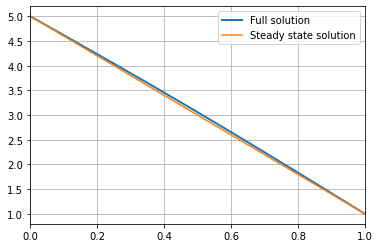

In [3]:
# Initialise arrays and equations
x, t = symbols('x t')
L = 1.
dx = 0.05
dt = 0.01
a = 1.
Tl = 5.
Tr = 1.
xl = np.arange(0,(L+dx),dx)
T = exp(-a*np.pi*np.pi*t)*sin(np.pi*x) + Tl*(L-x) + Tr*x
Tx = [T.subs(x,xi) for xi in xl]
Tc = np.array([xi.subs(t,0) for xi in Tx])

# Initialise plotting
fig = plt.figure()
ax = plt.axes(xlim=(0,L))
line, = ax.plot(xl,Tc,lw=2)
Ts = ax.plot([0.,L],[Tl,Tr])
ax.grid()
ax.legend(['Full solution', 'Steady state solution'])

def update(i):
    Ti = T.subs(t,x)
    Tc = np.array([xi.subs(t,dt*i) for xi in Tx])
    p = line.set_data(xl, Tc)
    return line,

anim2 = animation.FuncAnimation(fig, update, frames=30, interval=100, blit=True)
anim2

### Diffusive smoothing

In this example, we examine the effects of diffusive smoothing. Once again we consider the heat conduction in a beam. The classical heat equation in 1D is

$$
\frac{\partial T}{\partial t} = \alpha \frac{\partial^2 T}{\partial x^2} + q
$$

We consider the domain $x \in [-1,1]$. The boundary conditions are

$$
T(-1,t) = T(1,t) = 0
$$

and the initial conditions are

$$
T(x,0) =
\begin{cases}
1+x & x < 0 \\
1-x & x \geq 0
\end{cases}
$$

Again, we assume that no heat is applied and hence $q = 0$.

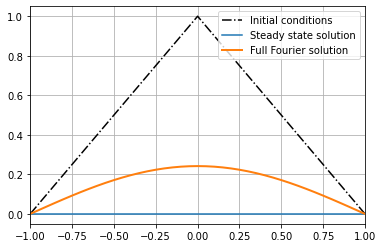

In [4]:
# Initialise arrays and equations
x, t, n = symbols('x t n')
L = 2.
dx = 0.05
dt = 0.01
a = 1.
Tl = 0.
Tr = 0.
xl = np.arange(-1,1+dx,dx)

# Calculate initial conditions
T = Piecewise((0, x < -1), (1+x, x <= 0), (1-x, x <= 1), (0, True))
Ti = np.array([T.subs(x,xi) for xi in xl])

# Calculate Fourier series
Tp = Piecewise((0, x < -2), (1+x, x <= 0), (1-x, x <= 2), (0, True)) # Model T as triangular wave between -2,2 to maintain BC
lr = n*pi/2
dn = (1/2)*(integrate(Tp*(cos(lr*x)), (x, -2, 2))) # Even function
Tt = dn*exp(-lr*lr*a*t)*cos(lr*x)
Tf = np.sum([Tt.subs(n, i) for i in range(1,16)]) # Sum of Fourier terms

Tx = [Tf.subs(x,xi) for xi in xl]
Tc = np.array([xi.subs(t,0) for xi in Tx])

# Initialise plotting
fig = plt.figure()
ax = plt.axes(xlim=(-1,1))
_ = ax.plot(xl,Ti,'k-.')
Ts = ax.plot([-1,1],[Tl,Tr])
line, = ax.plot(xl,Tc,lw=2)
ax.grid()
ax.legend(['Initial conditions', 'Steady state solution', 'Full Fourier solution'], loc='upper right')

def update(i):
    Ti = T.subs(t,x)
    Tc = np.array([xi.subs(t,dt*i) for xi in Tx])
    p = line.set_data(xl, Tc)
    return line,

anim2 = animation.FuncAnimation(fig, update, frames=50, interval=100, blit=True)
anim2